In [1]:
import pandas as pd 
from google.cloud import bigquery

#https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=covid19_jhu_csse&page=dataset&project=majestic-lead-418020&ws=!1m4!1m3!3m2!1sbigquery-public-data!2scovid19_jhu_csse
#usada debido a que es un estudio realizado por una universidad de ciencia computacional e ingeniería y ya que nuestra carrera es de ingeniería lo vi útl (se esta utilizando la tabla casos confirmados, "confirmed_cases").
#https://ukhsa-dashboard.data.gov.uk
#para el caso de la API ya que el anterior era un estudio americano opte por ver una comparación en otro continente.


#dentro del parentesis no toma el proyect client = bigquery.Client(proyect='bigquery-public-data.covid19_jhu_csse')
client = bigquery.Client()#('bigquery-public-data.covid19_jhu_csse')

In [2]:
#el primer slot se le debe colocar lo que sigue en bigquery-public-data.
dataset_ref = client.dataset("covid19_open_data", project="bigquery-public-data")
#cambio de base a bigquery-public-data.covid19_open_data

dataset = client.get_dataset(dataset_ref)

In [3]:
query = """
        SELECT distinct date, new_confirmed
        FROM bigquery-public-data.covid19_open_data.covid19_open_data
        WHERE country_name = 'Chile'
        """

In [4]:
query_job = client.query(query)
chilean_cases = query_job.to_dataframe()
chilean_cases

,date,new_confirmed
0,2020-10-26,1505
1,2021-06-27,54
2,2021-04-30,87
3,2021-05-12,85
4,2021-02-11,126
...,...,...
41219,2022-05-17,51
41220,2022-05-30,51
41221,2021-04-08,51
41222,2022-06-03,51


In [5]:
chilean_cases.groupby("date").agg("sum")

,new_confirmed
date,
2020-01-01,0
2020-01-02,0
2020-01-03,0
2020-01-04,0
2020-01-05,0
...,...
2022-09-13,3742
2022-09-14,0
2022-09-15,0


In [6]:
chilean_cases = chilean_cases.dropna().sort_values('date').reset_index(drop=True)
chilean_cases

,date,new_confirmed
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0
...,...,...
40485,2022-09-13,223
40486,2022-09-13,120
40487,2022-09-13,39
40488,2022-09-13,17


<Axes: title={'center': 'chilean cases'}, xlabel='date', ylabel='n° de casos'>

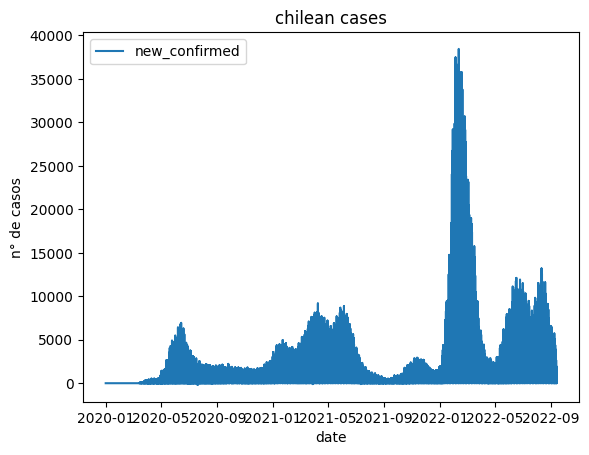

In [14]:
chilean_cases.set_index('date').plot(title = "chilean cases", ylabel = "n° de casos")
#colocar el nombre de la tabla y luego decir el eje x que se quiere tener.

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/COVID-19-Chile-log.svg/langes-500px-COVID-19-Chile-log.svg.png>


In [ ]:
#Podemos observar una concordancia entre los casos nuevos entre ambas graficas.

In [8]:
#chilean_cases.set_index('date').plot(title = "chilean cases")

In [10]:
query = """
        SELECT distinct date, new_deceased
        FROM bigquery-public-data.covid19_open_data.covid19_open_data
        WHERE country_name = 'Chile'
        """

query_job = client.query(query)
chilean_deaths = query_job.to_dataframe()

In [11]:
chilean_deaths = chilean_deaths.dropna().sort_values('date').reset_index(drop=True)
chilean_deaths

,date,new_deceased
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0
...,...,...
7562,2022-09-12,2
7563,2022-09-13,2
7564,2022-09-13,10
7565,2022-09-13,0


<Axes: title={'center': 'chilean deaths'}, xlabel='date', ylabel='n° de muertes'>

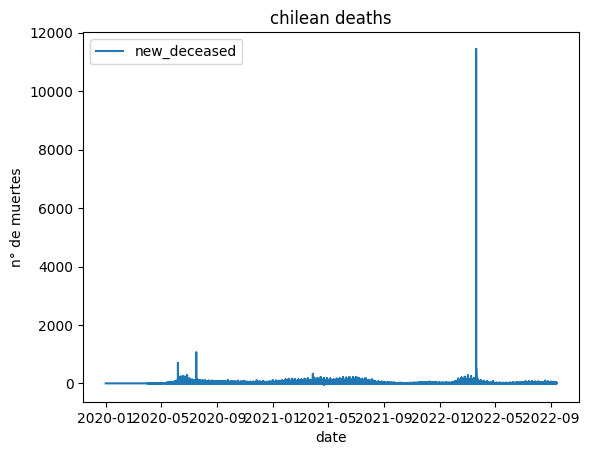

In [12]:
chilean_deaths.set_index('date').plot(title = "chilean deaths", ylabel = "n° de muertes")

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/COVID-19-Chile-log.svg/langes-500px-COVID-19-Chile-log.svg.png>


In [ ]:
#Nuevamente podemos ver una relación entre los casos de muertes entre ambas gráficas.